In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

In [8]:
os.chdir('E:\\Ragveen\\freelance')

In [9]:
model = pd.read_csv('datacstrnth.csv')

In [10]:
model.head(5)

,S.No,cement,sand,coarse aggregate,Water,W/C Ratio,AGE(Days),compressive
0,1,600,1200,2400,360.0,0.60,7,122.3664
1,2,600,1200,2400,360.0,0.60,28,152.9580
2,3,550,1100,2200,302.5,0.55,7,117.2678
3,4,550,1100,2200,302.5,0.55,28,158.0566
4,5,500,1000,2000,250.0,0.50,7,112.1692


In [12]:
del model['S.No']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model, model.compressive,test_size= 0.25, random_state=32)

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score

target = "compressive"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    testy = dtesty.reset_index()["compressive"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

import warnings
warnings.filterwarnings("ignore")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.084229945850415e-14
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -4.4529620377915676e-27
cv-std  : 5.534399267944123e-27
cv-max  : -0.0
cv-min  : -2.080068434886764e-26


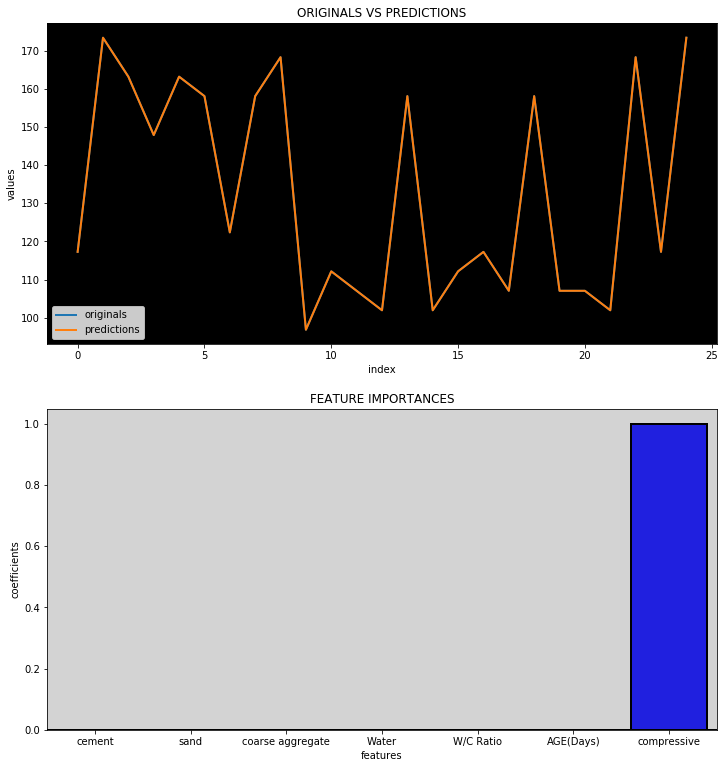

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test,"coef")

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 0.04192388662783049
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -0.0015981513698673558
cv-std  : 0.000529550157492306
cv-max  : -0.00048575682614862407
cv-min  : -0.002351375996509315


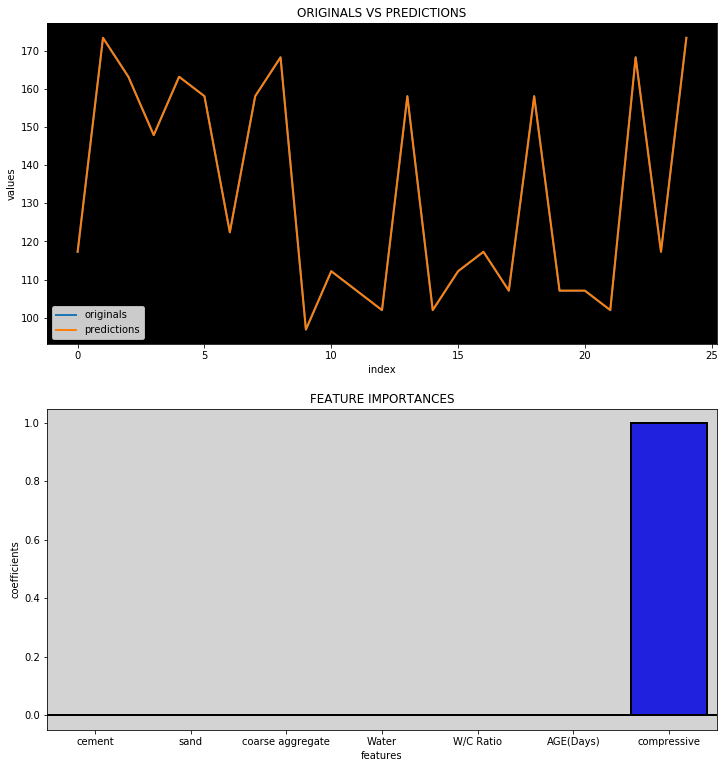

In [20]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,X_train,y_train,X_test,y_test,"coef")

In [21]:
from sklearn.metrics import r2_score

def performance_metric(y_train, y_test):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_train, y_test)

    # Return the score
    return score

In [22]:
from sklearn.linear_model import LinearRegression
model_lm = LinearRegression()
model_lm.fit(X_train,y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#How good is the function? Let us check the MSE (Mean squared error). First on the training data
mse_train_lm = np.mean((model_lm.predict(X_train)-y_train)**2)
print(mse_train_lm)

2.5768614785587483e-27


In [24]:
# Check on test data 
mse_test_lm = np.mean((model_lm.predict(X_test)-y_test)**2)
print(mse_test_lm)

2.5849394142282116e-27


In [25]:
print('Coefficients: \n',model_lm.coef_)

Coefficients: 
 [ 5.89672418e-17 -1.77964978e-17 -9.33701887e-17  1.20768428e-16
  2.13184342e-14 -1.23277621e-15  1.00000000e+00]


In [29]:
from sklearn.neural_network import MLPRegressor
model_MLP = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(3, 2), random_state=1)
model_MLP.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
#How good is the function? Let us check the MSE (Mean squared error). First on the training data
mse_train_MLP = np.mean((model_MLP.predict(X_train)-y_train)**2)
print(mse_train_MLP)

0.0006192680686304313


In [31]:
# Check on test data 
mse_test_MLP = np.mean((model_MLP.predict(X_test)-y_test)**2)
print(mse_test_MLP)

0.00042824051889259565
